## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

import os

# Study data files
mouse_metadata_path = os.path.join("data", "Mouse_metadata.csv")
study_results_path = os.path.join("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# View data
mouse_metadata.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [2]:
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [3]:
# View data
study_results.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [4]:
# study_results.count()

In [5]:
# Combine the data into a single dataset
study_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", suffixes=("_mouse", "_study"))

# Display the data table for preview
study_data_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [6]:
# study_data_df.count()

In [7]:
# Checking the number of mice.
mouse_count = len(study_data_df["Mouse ID"].unique())
mouse_count

249

In [8]:
# Checking details surrounding each mouse.
# Based on the number of time points, each mouse should not be liste more than 10 times. 
mouse_count2 = study_data_df["Mouse ID"].value_counts()
mouse_count2

g989    13
g316    10
a818    10
j984    10
g570    10
        ..
x226     1
t573     1
d133     1
u153     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [9]:
# Checking the number of Time Points
time_point = study_data_df['Timepoint'].value_counts()
time_point

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Based on above results, Mouse ID g989 shows up multiple times. 

study_data_mice_df = study_data_df.set_index('Mouse ID')
mouse_g989 = study_data_mice_df.loc['g989', ]
mouse_g989.head(25)


Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                           
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         25   
g989         Propriva  Female          21          26         30   
g989         Propriva  Female          21          26         35   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
g989               45.000000                 0  
g989               45.000000                 0  
g989               48.786801                 0  
g989               47.570392                 0  
g989               51.745156                 0  
g989               49.880528                 0  
g989               51.325852                 1  
g989               53.442020                 0  
g989               55.326122                 1  
g989               54.657650                 1  
g989               56.045564                 1  
g989               59.082294                 1  
g989               62.570880                 2

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 



In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Delete the data for g989
study_data_minus_g989 = study_data_mice_df.drop(index = 'g989')
clean_study_data = study_data_minus_g989.reset_index()
clean_study_data.head()


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [13]:
# clean_study_data.count()

In [14]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = len(clean_study_data["Mouse ID"].unique())
mouse_count2

248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen. This method is the most straighforward, creating multiple series and putting them all together at the end.

In [40]:
# Create initial table based on clean up data base for Drug Regimes and counts. 
tumor_response = pd.DataFrame(clean_study_data.groupby('Drug Regimen').count())

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
tumor_response["Mean"] = pd.DataFrame(clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
tumor_response["Median"] = pd.DataFrame(clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
tumor_response["STD"] = pd.DataFrame(clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
tumor_response["SEM"] = pd.DataFrame(clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())
tumor_response["Variance"] = pd.DataFrame(clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())

# Show table
tumor_response.head(25)

Mouse ID  Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen                                                     
Capomulin          230  230         230         230        230   
Ceftamin           178  178         178         178        178   
Infubinol          178  178         178         178        178   
Ketapril           188  188         188         188        188   
Naftisol           186  186         186         186        186   
Placebo            181  181         181         181        181   
Propriva           148  148         148         148        148   
Ramicane           228  228         228         228        228   
Stelasyn           181  181         181         181        181   
Zoniferol          182  182         182         182        182   

              Tumor Volume (mm3)  Metastatic Sites       Mean     Median  \
Drug Regimen                                                               
Capomulin                    230               230  40.675741  41.557809   
Ceftamin                     178               178  52.591172  51.776157   
Infubinol                    178               178  52.884795  51.820584   
Ketapril                     188               188  55.235638  53.698743   
Naftisol                     186               186  54.331565  52.509285   
Placebo                      181               181  54.033581  52.288934   
Propriva                     148               148  52.320930  50.446266   
Ramicane                     228               228  40.216745  40.673236   
Stelasyn                     181               181  54.233149  52.431737   
Zoniferol                    182               182  53.236507  51.818479   

                   STD       SEM   Variance  
Drug Regimen                                 
Capomulin     4.994774  0.329346  24.947764  
Ceftamin      6.268188  0.469821  39.290177  
Infubinol     6.567243  0.492236  43.128684  
Ketapril      8.279709  0.603860  68.553577  
Naftisol      8.134708  0.596466  66.173479  
Placebo       7.821003  0.581331  61.168083  
Propriva      6.622085  0.544332  43.852013  
Ramicane      4.846308  0.320955  23.486704  
Stelasyn      7.710419  0.573111  59.450562  
Zoniferol     6.966589  0.516398  48.533355

In [17]:
# Clean up table to for requested information. 

# This method produces everything in a single groupby function
summary_df = tumor_response[["Mouse ID", "Mean", "Median", "Variance", "STD", "SEM"]]

# Rename columns. Format numbers. 
summary_df=summary_df.rename(columns = {"Mouse ID" : "Trials"})
summary_df ["Mean"] = summary_df["Mean"].map("{:,.3f}".format)
summary_df ["Mdian"] = summary_df["Median"].map("{:,.3f}".format)
summary_df ["Variance"] = summary_df["Variance"].map("{:,.3f}".format)
summary_df ["STD"] = summary_df["STD"].map("{:,.3f}".format)
summary_df ["SEM"] = summary_df["SEM"].map("{:,.3f}".format)


# Show table
summary_df.head(25)


Trials    Mean     Median Variance    STD    SEM   Mdian
Drug Regimen                                                          
Capomulin        230  40.676  41.557809   24.948  4.995  0.329  41.558
Ceftamin         178  52.591  51.776157   39.290  6.268  0.470  51.776
Infubinol        178  52.885  51.820584   43.129  6.567  0.492  51.821
Ketapril         188  55.236  53.698743   68.554  8.280  0.604  53.699
Naftisol         186  54.332  52.509285   66.173  8.135  0.596  52.509
Placebo          181  54.034  52.288934   61.168  7.821  0.581  52.289
Propriva         148  52.321  50.446266   43.852  6.622  0.544  50.446
Ramicane         228  40.217  40.673236   23.487  4.846  0.321  40.673
Stelasyn         181  54.233  52.431737   59.451  7.710  0.573  52.432
Zoniferol        182  53.237  51.818479   48.533  6.967  0.516  51.818

## Bar and Pie Charts

<Figure size 720x360 with 0 Axes>

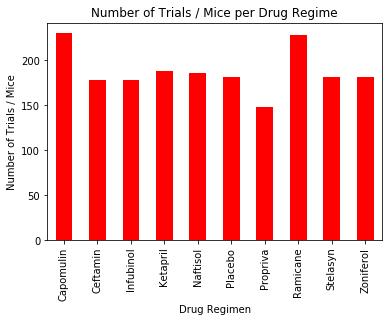

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
number_of_mice = summary_df[["Trials"]]

# Use DataFrame.plot to create a bar chart
plt.figure(figsize=(10,5))
number_of_mice.plot(kind="bar", color = "r", legend = False)

# Add titles. 
plt.title ("Number of Trials / Mice per Drug Regime")
plt.ylabel ("Number of Trials / Mice")

plt.show()

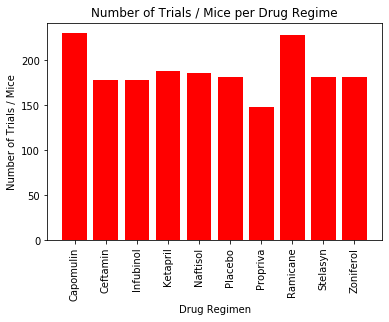

In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study 
# using Matplotlib pyplot.

# Create x-axis
x_axis = np.arange(len(number_of_mice))
x_axis

# Create bar chart
plt.bar(x_axis, number_of_mice["Trials"], color='r', align="center")

# Add titles and details for x-axis
plt.title ("Number of Trials / Mice per Drug Regime")
plt.ylabel ("Number of Trials / Mice")
plt.xticks(x_axis, number_of_mice.index.values, rotation="vertical")
plt.xlabel ("Drug Regimen")

# Show plot
plt.show()

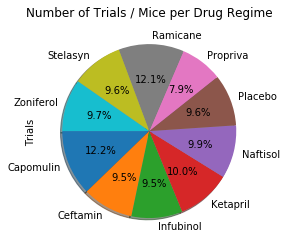

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

number_of_mice = summary_df[["Trials"]]

explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Use DataFrame.plot to create a bar chart
number_of_mice.plot(kind="pie", explode=explode, labels=number_of_mice.index.values, autopct="%1.1f%%", 
                    shadow=True, startangle=180, subplots=True, legend=False)

# Add titles.
plt.title("Number of Trials / Mice per Drug Regime")

plt.show()


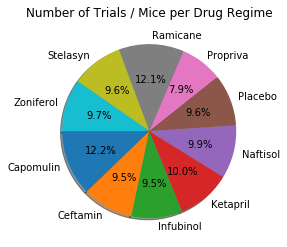

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

number_of_mice = summary_df[["Trials"]]

# Use DataFrame.plot to create a bar chart
plt.pie(number_of_mice['Trials'], explode=explode, labels=number_of_mice.index.values, autopct="%1.1f%%", 
       shadow=True, startangle=180)

# plt.axis('equal')

# Add titles.
plt.title("Number of Trials / Mice per Drug Regime")

plt.show()

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regime_df = clean_study_data.loc[(clean_study_data["Drug Regimen"] == "Capomulin") | 
                                          (clean_study_data["Drug Regimen"] == "Ramicane") |
                                         (clean_study_data["Drug Regimen"] == "Infubinol") |
                                         (clean_study_data["Drug Regimen"] == "Ceftamin")]
selected_regime_df

# Start by getting the last (greatest) timepoint for each mouse
selected_regime_df = selected_regime_df.sort_values("Timepoint", ascending = False)
selected_regime_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
selected_regime_df = selected_regime_df.drop_duplicates(subset = "Mouse ID", keep='first')
selected_regime_df



Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1859     z581    Infubinol  Female          24          25         45   
800      e476    Infubinol    Male          23          26         45   
154      c758     Ramicane    Male           9          17         45   
440      i557    Capomulin  Female           1          24         45   
144      m957    Capomulin  Female           3          19         45   
...       ...          ...     ...         ...         ...        ...   
1192     m756    Infubinol    Male          19          30          5   
1730     x226     Ceftamin    Male          23          28          0   
594      b447     Ceftamin    Male           2          30          0   
1538     t573     Ceftamin  Female          15          27          0   
1570     u153     Ceftamin  Female          11          25          0   

      Tumor Volume (mm3)  Metastatic Sites  
1859           62.754451                 3  
800            62.435404                 1  
154            33.397653                 1  
440            47.685963                 1  
144            33.329098                 1  
...                  ...               ...  
1192           47.010364                 1  
1730           45.000000                 0  
594            45.000000                 0  
1538           45.000000                 0  
1570           45.000000                 0  

[100 rows x 8 columns]

In [54]:
# Determine the quartiles and IQR
quartiles = selected_regime_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Calculate the outlier boundaries
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Capture outliers in a new dataframe
outlier_data = selected_regime_df.loc[(selected_regime_df['Tumor Volume (mm3)'] < lower_bound) | 
                                      (selected_regime_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_data
    

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []

In [55]:
# Based on the above table not containing any mice name / details, it is assumed that there are no outliers. 

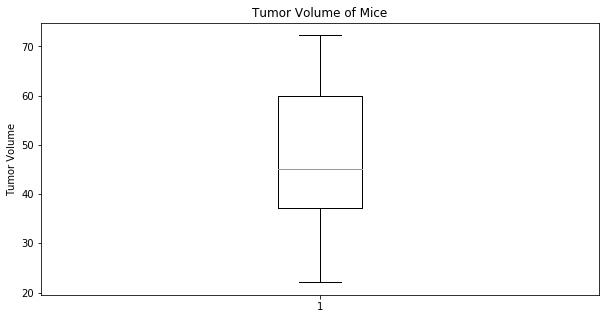

In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10,5))

tumor_size = selected_regime_df['Tumor Volume (mm3)']

plt.title('Tumor Volume of Mice')
plt.ylabel('Tumor Volume')
plt.boxplot(tumor_size)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
